# 커피 경험과 선호도의 상관관계 : 커피에 대한 전문성 수준과 커피의 선호도

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datalab351/great-american-coffee-taste-test")

print("Path to dataset files:", path)

100%|██████████| 495k/495k [00:00<00:00, 76.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/datalab351/great-american-coffee-taste-test/versions/1


In [4]:
import pandas as pd
import os

In [5]:
data = pd.read_csv(path + '/GACTT_RESULTS_ANONYMIZED.csv')
data

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,PA44VP,pD6v5B,10/26/23 23:27,>65 years old,35126,2,At home,True,False,False,...,Female,NaN,Married,"$100,000 - $149,999",Master's degree,White/Caucasian,NaN,Retired,2,Democrat
4038,vNgpPD,pD6v5B,10/26/23 23:31,>65 years old,35126,2,At home,True,False,False,...,Male,NaN,Married,"$100,000 - $149,999",Bachelor's degree,White/Caucasian,NaN,Retired,2,Republican
4039,g5ggRM,O7ekrg,10/26/23 23:32,18-24 years old,60131,1,"At a cafe, At home, On the go, At the office",True,True,True,...,Male,NaN,Married,"$100,000 - $149,999",Some college or associate's degree,White/Caucasian,NaN,Employed full-time,NaN,Democrat
4040,rlgbDN,N79OOb,10/27/23 0:43,25-34 years old,2351,2,At home,True,False,False,...,Male,NaN,Single,"$25,000 - $49,999",Bachelor's degree,White/Caucasian,NaN,Unemployed,NaN,Democrat


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 118 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(97)
memory usage: 3.6+ MB


In [7]:
data.isnull().sum()

,0
Submission ID,0
Respondent ID,0
Submitted at,0
What is your age?,31
What is your ZIP code?,78
...,...
Ethnicity/Race,624
Ethnicity/Race (please specify),3937
Employment Status,623
Number of Children,3186


In [8]:
pd.set_option('display.max_seq_items', None) # 이게 결과 생략 없이 전체 다 볼 수 있는거라고 합니다!

In [9]:
data.columns

Index(['Submission ID', 'Respondent ID', 'Submitted at', 'What is your age?',
       'What is your ZIP code?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee?',
       'Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       'Where do you typically drink coffee? (At a cafe)',
       'Where do you typically drink coffee? (None of these)',
       'How do you brew coffee at home?',
       'How do you brew coffee at home? (Pour over)',
       'How do you brew coffee at home? (French press)',
       'How do you brew coffee at home? (Espresso)',
       'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
       'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
       'How do you brew coffee at home? (Instant coffee)',
       'How do you brew coffee at hom

## 목표와 상관 없다고 판단하는 열 버리기
- 목표 : 커피의 전문성과 선호도의 상관관계
- 커피의 전문성 : 'Lastly, how would you rate your own coffee expertise?'
- 선호도 관련 칼럼 중에서도 note와 같이 여러 응답이 있는 것도 제외

In [10]:
# 개인
data = data[[ 'Lastly, how would you rate your own coffee expertise?',
       'Coffee A - Bitterness', 'Coffee A - Acidity',
       'Coffee A - Personal Preference',
       'Coffee B - Bitterness', 'Coffee B - Acidity',
       'Coffee B - Personal Preference',
       'Coffee C - Bitterness', 'Coffee C - Acidity',
       'Coffee C - Personal Preference',
       'Coffee D - Bitterness', 'Coffee D - Acidity',
       'Coffee D - Personal Preference',
       'Between Coffee A, Coffee B, and Coffee C which did you prefer?',
       'Between Coffee A and Coffee D, which did you prefer?',
       'Lastly, what was your favorite overall coffee?']]

In [11]:
data

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,2.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,4.0,5.0,5.0,1.0,Coffee A,Coffee A,Coffee A
4038,2.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0,Coffee A,Coffee A,Coffee A
4039,5.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0,Coffee B,Coffee D,Coffee C
4040,6.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,Coffee A,Coffee A,Coffee A


In [12]:
data.isnull().sum()

,0
"Lastly, how would you rate your own coffee expertise?",104
Coffee A - Bitterness,244
Coffee A - Acidity,263
Coffee A - Personal Preference,253
Coffee B - Bitterness,262
Coffee B - Acidity,275
Coffee B - Personal Preference,269
Coffee C - Bitterness,278
Coffee C - Acidity,291
Coffee C - Personal Preference,276


In [13]:
# 알고 싶은 전문성이 비어있으면 안 되니 해당 열이 NaN인 행은 제외

data = data.dropna(subset=['Lastly, how would you rate your own coffee expertise?'], axis=0)
data

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
14,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Coffee A,Coffee D,Coffee B
16,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Coffee C,Coffee D,Coffee D
17,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Coffee A,Coffee A,Coffee B
19,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0,NaN,Coffee D,Coffee A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,2.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,4.0,5.0,5.0,1.0,Coffee A,Coffee A,Coffee A
4038,2.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0,Coffee A,Coffee A,Coffee A
4039,5.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0,Coffee B,Coffee D,Coffee C
4040,6.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,Coffee A,Coffee A,Coffee A


In [14]:
data.isnull().sum()

,0
"Lastly, how would you rate your own coffee expertise?",0
Coffee A - Bitterness,148
Coffee A - Acidity,166
Coffee A - Personal Preference,157
Coffee B - Bitterness,166
Coffee B - Acidity,178
Coffee B - Personal Preference,172
Coffee C - Bitterness,179
Coffee C - Acidity,191
Coffee C - Personal Preference,176


In [15]:
# 선호도와 밀접한 관련이 있는 'Between Coffee A, Coffee B, and Coffee C which did you prefer?',	'Between Coffee A and Coffee D, which did you prefer?',	'Lastly, what was your favorite overall coffee?' 에서 NaN도 제거

data = data.dropna(subset=['Between Coffee A, Coffee B, and Coffee C which did you prefer?', 'Between Coffee A and Coffee D, which did you prefer?', 'Lastly, what was your favorite overall coffee?'], axis=0)
data

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
15,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Coffee A,Coffee D,Coffee B
16,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Coffee C,Coffee D,Coffee D
17,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Coffee A,Coffee A,Coffee B
34,8.0,3.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,3.0,5.0,2.0,3.0,Coffee B,Coffee A,Coffee B
40,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,4.0,3.0,4.0,Coffee C,Coffee D,Coffee C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,2.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,4.0,5.0,5.0,1.0,Coffee A,Coffee A,Coffee A
4038,2.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0,Coffee A,Coffee A,Coffee A
4039,5.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0,Coffee B,Coffee D,Coffee C
4040,6.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,Coffee A,Coffee A,Coffee A


In [16]:
data.isnull().sum()

,0
"Lastly, how would you rate your own coffee expertise?",0
Coffee A - Bitterness,8
Coffee A - Acidity,20
Coffee A - Personal Preference,11
Coffee B - Bitterness,9
Coffee B - Acidity,13
Coffee B - Personal Preference,10
Coffee C - Bitterness,10
Coffee C - Acidity,23
Coffee C - Personal Preference,12


In [17]:
# NaN값 Median으로 처리하기 위해서 str 열 잠시 temp로 이동

temp = data[['Between Coffee A, Coffee B, and Coffee C which did you prefer?', 'Between Coffee A and Coffee D, which did you prefer?', 'Lastly, what was your favorite overall coffee?']]
data = data.drop(columns = ['Between Coffee A, Coffee B, and Coffee C which did you prefer?', 'Between Coffee A and Coffee D, which did you prefer?', 'Lastly, what was your favorite overall coffee?'])
data

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
15,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
17,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
34,8.0,3.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,3.0,5.0,2.0,3.0
40,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,2.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,4.0,5.0,5.0,1.0
4038,2.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0
4039,5.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0
4040,6.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0


In [18]:
temp

,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
15,Coffee A,Coffee D,Coffee B
16,Coffee C,Coffee D,Coffee D
17,Coffee A,Coffee A,Coffee B
34,Coffee B,Coffee A,Coffee B
40,Coffee C,Coffee D,Coffee C
...,...,...,...
4037,Coffee A,Coffee A,Coffee A
4038,Coffee A,Coffee A,Coffee A
4039,Coffee B,Coffee D,Coffee C
4040,Coffee A,Coffee A,Coffee A


In [19]:
# NaN 값 중앙값ㅅㅅ으로 채워넣기

data = data.fillna(data.median())
data

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
15,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
17,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
34,8.0,3.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,3.0,5.0,2.0,3.0
40,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,2.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,4.0,5.0,5.0,1.0
4038,2.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0
4039,5.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0
4040,6.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0


In [20]:
temp

,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
15,Coffee A,Coffee D,Coffee B
16,Coffee C,Coffee D,Coffee D
17,Coffee A,Coffee A,Coffee B
34,Coffee B,Coffee A,Coffee B
40,Coffee C,Coffee D,Coffee C
...,...,...,...
4037,Coffee A,Coffee A,Coffee A
4038,Coffee A,Coffee A,Coffee A
4039,Coffee B,Coffee D,Coffee C
4040,Coffee A,Coffee A,Coffee A


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
temp['Between Coffee A, Coffee B, and Coffee C which did you prefer?'] = le.fit_transform(temp['Between Coffee A, Coffee B, and Coffee C which did you prefer?'])
temp['Between Coffee A and Coffee D, which did you prefer?'] = le.fit_transform(temp['Between Coffee A and Coffee D, which did you prefer?'])
temp['Lastly, what was your favorite overall coffee?'] = le.fit_transform(temp['Lastly, what was your favorite overall coffee?'])
temp

<ipython-input-21-03e6bcd51a9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Between Coffee A, Coffee B, and Coffee C which did you prefer?'] = le.fit_transform(temp['Between Coffee A, Coffee B, and Coffee C which did you prefer?'])
<ipython-input-21-03e6bcd51a9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Between Coffee A and Coffee D, which did you prefer?'] = le.fit_transform(temp['Between Coffee A and Coffee D, which did you prefer?'])
<ipython-input-21-03e6bcd51a9f>:6: SettingWith

,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
15,0,1,1
16,2,1,3
17,0,0,1
34,1,0,1
40,2,1,2
...,...,...,...
4037,0,0,0
4038,0,0,0
4039,1,1,2
4040,0,0,0


In [22]:
result = pd.concat([data,temp],axis=1)
result

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
15,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,1
16,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2,1,3
17,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0,0,1
34,8.0,3.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,3.0,5.0,2.0,3.0,1,0,1
40,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,2.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,4.0,5.0,5.0,1.0,0,0,0
4038,2.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0,0,0,0
4039,5.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0,1,1,2
4040,6.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,0,0,0


In [27]:
result.to_csv('/content/drive/MyDrive/DAT/DAT/coffee.csv')

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
result.corr()

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
"Lastly, how would you rate your own coffee expertise?",1.000000,-0.104923,0.061586,0.208848,0.054149,-0.072690,-0.110615,0.071529,-0.087573,-0.081106,-0.152110,0.046543,0.290623,-0.176024,0.117379,0.100303
Coffee A - Bitterness,-0.104923,1.000000,-0.106950,-0.184942,-0.009185,0.163747,0.044739,-0.088321,0.171298,0.118424,0.145446,0.060682,-0.100340,0.152257,0.003936,0.027752
Coffee A - Acidity,0.061586,-0.106950,1.000000,-0.032973,0.178033,0.040376,0.042118,0.159019,-0.085870,0.038448,-0.041065,0.071181,0.103422,0.007183,0.087280,0.024441
Coffee A - Personal Preference,0.208848,-0.184942,-0.032973,1.000000,0.113878,-0.080055,-0.212047,0.149603,-0.046884,-0.266431,-0.055944,0.070778,0.251336,-0.616867,-0.281096,-0.257917
Coffee B - Bitterness,0.054149,-0.009185,0.178033,0.113878,1.000000,-0.048119,-0.192634,0.185097,0.056638,-0.063807,-0.108091,0.148350,0.148129,-0.114087,0.065044,0.038501
Coffee B - Acidity,-0.072690,0.163747,0.040376,-0.080055,-0.048119,1.000000,0.035607,0.040314,0.133955,0.100727,0.166428,-0.044495,-0.078031,0.133868,-0.023877,0.005590
Coffee B - Personal Preference,-0.110615,0.044739,0.042118,-0.212047,-0.192634,0.035607,1.000000,0.009247,0.020307,0.166753,0.147066,0.047461,-0.351447,0.197746,-0.182997,-0.204738
Coffee C - Bitterness,0.071529,-0.088321,0.159019,0.149603,0.185097,0.040314,0.009247,1.000000,-0.083571,-0.215446,-0.017975,0.098711,0.145547,-0.172290,0.027516,-0.017922
Coffee C - Acidity,-0.087573,0.171298,-0.085870,-0.046884,0.056638,0.133955,0.020307,-0.083571,1.000000,0.098944,0.156266,0.018505,-0.074946,0.081750,-0.031165,-0.007936
Coffee C - Personal Preference,-0.081106,0.118424,0.038448,-0.266431,-0.063807,0.100727,0.166753,-0.215446,0.098944,1.000000,0.144475,0.014470,-0.288823,0.614208,-0.100317,0.034989


<Axes: >

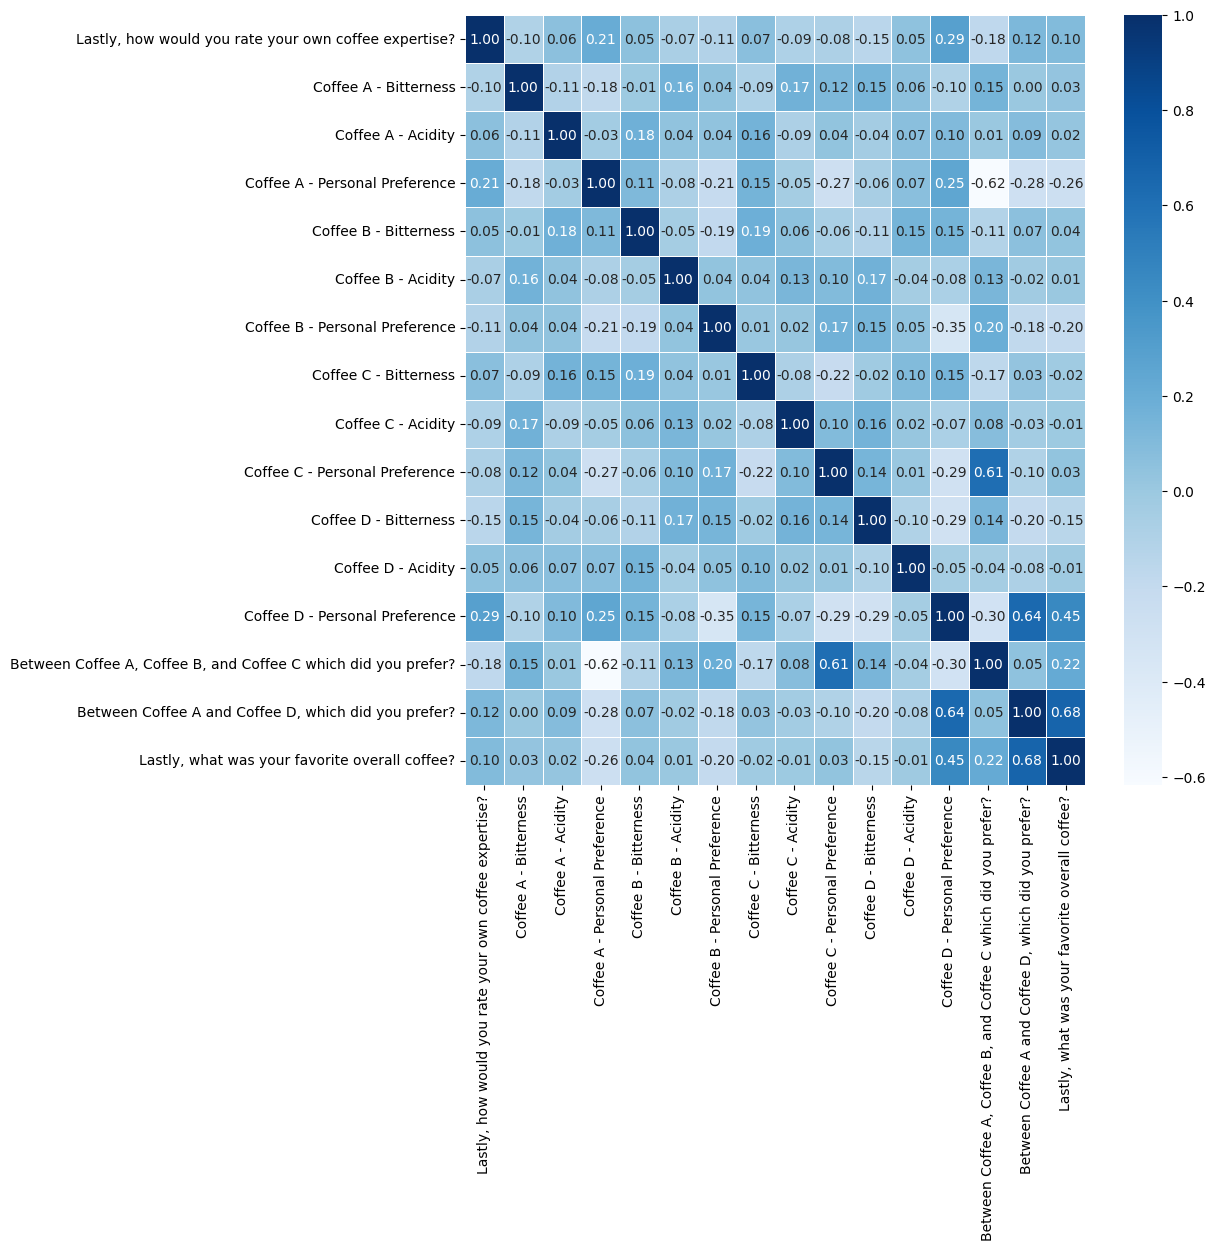

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data = result.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

# 시각화 & 분석
- 전처리 한 csv로 Power BI 작업을 하고 싶었으나 계소된 오류로 전처리가 안 된 csv 파일을 이용했습니다.
- 또한, 전체 데이터를 사용해서 그런지 렉이 너무 심하게 걸려서... 예쁘고 유의미한 차트를 끌어내지 못했습니다... 죄송합니다...

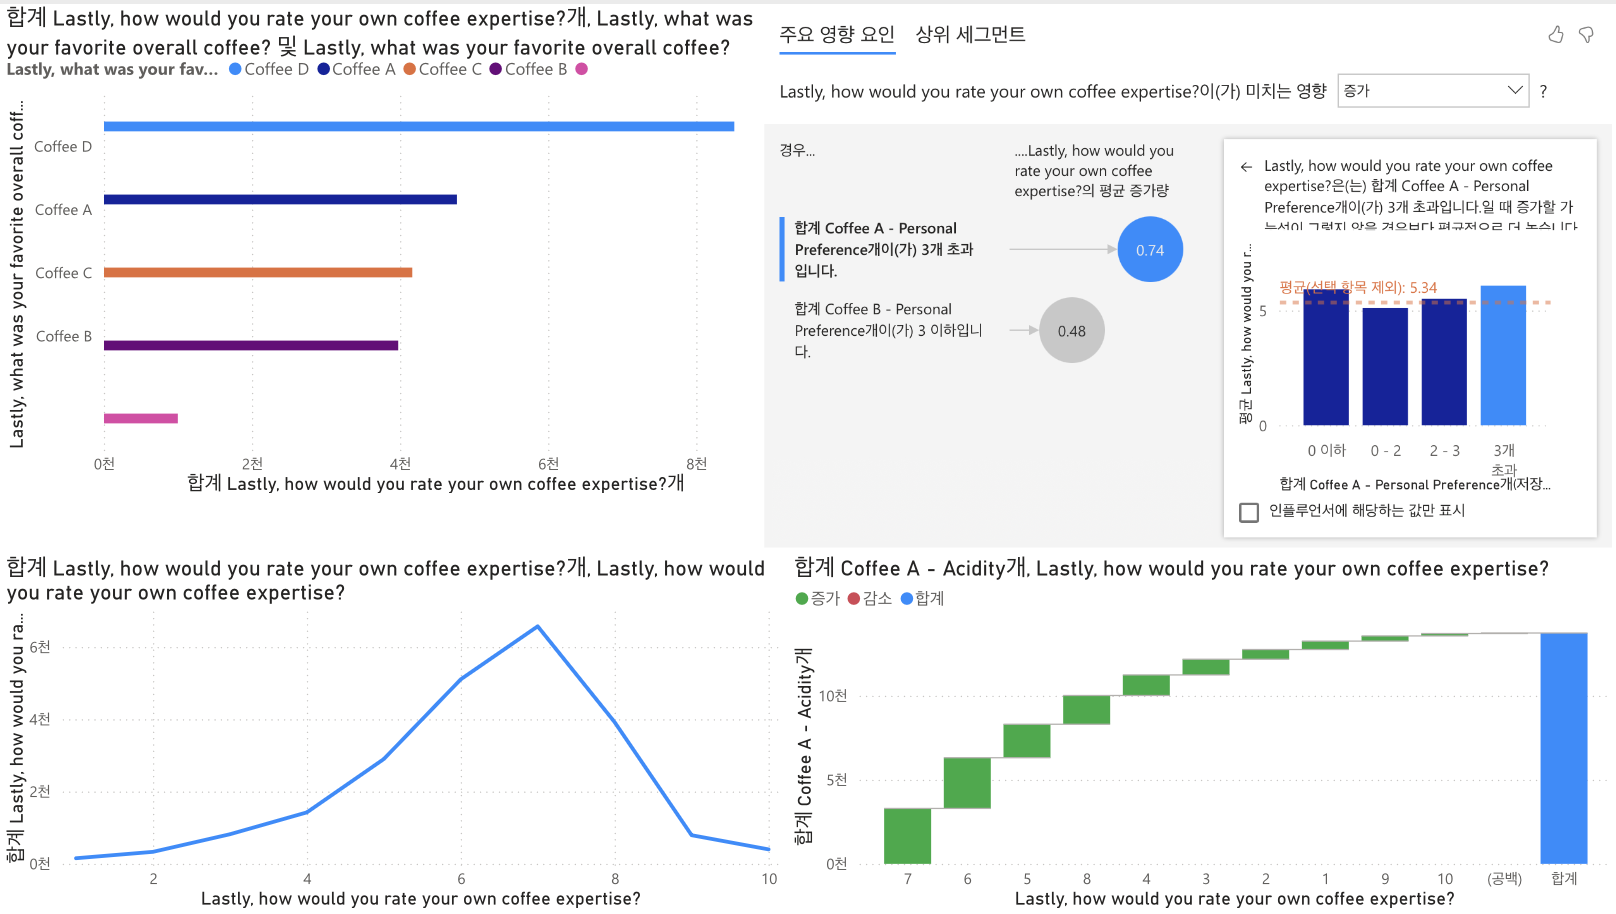

**1. 첫 번째 차트 : 선호하는 커피 종류와 자신의 커피 전문성 평가**
- 커피 전문성이 높을수록 Coffee D를 선호하는 경향을 보여준다
- => 커피 전문성이 높으면 라이트 로스트, 내추럴 프로세스(발효, 과일향) 맛을 좋아한다.  

**2. 두 번째 차트 : Coffee A와 B의 개인적 선호도와 전문성 평가 간 관계**
- Coffee A의 개인적 선호도가 3 이상일 때, 자신의 커피 전문성이 평균적으로 0.74만큼 증가
- Coffee B의 선호도가 3 이하일 때, 전문성 평가가 0.48 감소
- => 선호 커피가 자신의 커피 전문성을 평가하는데 영향을 줄 수 있습니다.
- => 라이트 로스트, 워시드 프로세스(A) 맛의 선호도가 높은 사람은 자신의 커피 전문성이 높다고 판단하며, 미디엄 로스트 맛의 선호도가 높은 사람은 자신의 커피 전문성이 낮다고 판단합니다.
- => 나의 생각 추가 : 미디엄 로스트는 아무래도 보편적인것이라서 이걸 좋아하는건 내가 딱히 즐기는류는 아니다 싶어서 아닐까요? 반대로 라이트는 사실 좋아하는 사람이 흔치 않아서 이를 좋아한다면 커피를 즐긴다고 판단하는게 아닐까 싶습니다.  

**3. 커피 전문성에 대한 자가 평가 분포**
- 자신의 전문성을 6~7로 평가한 사람이 가장 많은 것을 밨을 때 대부분의 응답자가 자신을 중간 수준 이상의 전문가라고 판단하고 있습니다.
- (나의 생각 추가 : 그래서 뭔가 결과 신뢰도가... 떨어지는 것 같아요).


**4. Coffee A의 산미와 전문성 평가 간 상관관계**
- 전문성이 7 이상일수록 Coffee A의 산미를 긍정적으로 평가하는 경향이 컸습니다.
- 즉, 산미를 선호하지 않는 사람은 전문성이 낮다고 평가하는 것 같습니다.
- 이처럼 다른 커피와 맛을 이렇게 본다면 커피 전문성이 높을 때 특정 커피 맛(ex. 산미)를 더 잘 느낀다고 판단할 수 있습니다.